#Y= Outcome
#X= 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'

#Important Libraries

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

# Read Data

In [ ]:
df = pd.read_csv('diabetes2.csv')

In [ ]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
df.shape

(768, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [ ]:
df.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

In [ ]:
df.groupby('BMI').size()

BMI
0.0     11
18.2     3
18.4     1
19.1     1
19.3     1
        ..
53.2     1
55.0     1
57.3     1
59.4     1
67.1     1
Length: 248, dtype: int64

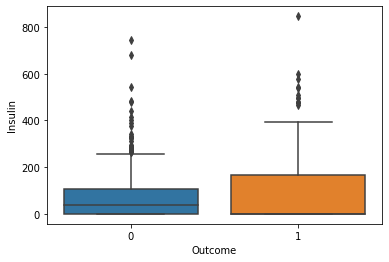

In [ ]:
sn.boxplot(x='Outcome', y='Insulin',data=df)
plt.show()

In [ ]:
sn.boxplot(x='Outcome', y='Glucose',data=df)
plt.show()

In [ ]:
sn.boxplot(x='Outcome', y='BMI',data=df)
plt.show()

#Visualization of Data

In [ ]:
df.hist(figsize = (20,20))

In [ ]:
sn.pairplot(df, hue = 'Outcome')

In [ ]:
sn.heatmap(df.corr())

In [ ]:
sn.countplot(x='Outcome',data=df)
plt.show()

In [ ]:
pd.pivot_table(df,index = ["Outcome"], values = ["Pregnancies",'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction' ],aggfunc=[np.max, np.min, np.mean,len ]).T

In [ ]:
pd.pivot_table(df,index = ["Outcome"], values = ["Pregnancies",'Glucose' ],aggfunc=[np.max, np.min, np.mean,len ]).T

# Data Cleaning

In [ ]:
df.columns

In [ ]:
df.groupby('BloodPressure').size()

Can minimum value of below listed columns be zero (0)?

On these columns, a value of zero does not make sense and thus indicates missing value.

Following columns or variables have an invalid zero value:

#Glucose
#BloodPressure
#SkinThickness
#Insulin
#BMI

##It is better to replace zeros with nan since after that counting them would be easier and zeros need to be replaced with suitable values

In [ ]:
df.head(10)

In [ ]:
df_copy = df.copy(deep = True)
df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]=df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [ ]:
df_copy.head(10)

In [ ]:
df.isnull().sum()

In [ ]:
df_copy.isnull().sum()

In [ ]:
df_copy['Glucose'].fillna(df_copy['Glucose'].mean(), inplace = True)

In [ ]:
df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].mean(), inplace = True)

In [ ]:
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].median(), inplace = True)

In [ ]:
df_copy['Insulin'].fillna(df_copy['Insulin'].median(), inplace = True)

In [ ]:
df_copy['BMI'].fillna(df_copy['BMI'].median(), inplace = True)

In [ ]:
df_copy.isnull().sum()

#Scaling the data
#Outlier!!! The Silent Killer

In [ ]:
df_copy.columns

In [ ]:
sn.boxplot(x='Outcome', y='BMI',data=df_copy)
plt.show()

In [ ]:
sn.boxplot(x='Outcome', y='Insulin',data=df_copy)
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_copy.drop('Outcome',axis=1))
scaled_features = scaler.transform(df.drop('Outcome',axis=1))
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat['Outcome']= df['Outcome']

In [ ]:
sn.boxplot(x='Outcome',y='Insulin',data=df_feat)
plt.show()

In [ ]:
sn.boxplot(x='Outcome', y='BMI',data=df_feat)
plt.show()

# Decide Dependant and Independant Elements in Data Set

a

In [ ]:
x=df_feat.drop('Outcome',axis=1)

In [ ]:
x

In [ ]:
y=df_feat['Outcome']

In [ ]:
y

#Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test =train_test_split(x,y,test_size=0.3)

In [ ]:
X_train.info()

In [ ]:
X_test.info()

#Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logmodel = LogisticRegression() 

In [ ]:
logmodel.fit(X_train,y_train)

In [ ]:
predictions = logmodel.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,predictions))

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
print(confusion_matrix(y_test,predictions))